In [18]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

In [19]:
# 1.8mm space functional data
# subj01, session 1
beta_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/betas_session01.nii.gz")
beta_t1 = beta_1pt8mm.slicer[:,:,:,0].get_fdata()/300 # get trial 1

In [20]:
print("session 1 beta, data shape:",beta_t1.shape)

session 1 beta, data shape: (81, 104, 83)


In [21]:
# 1.8mm space brain mask
brainmask_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/brainmask.nii.gz")
brainmask = brainmask_1pt8mm.get_fdata()

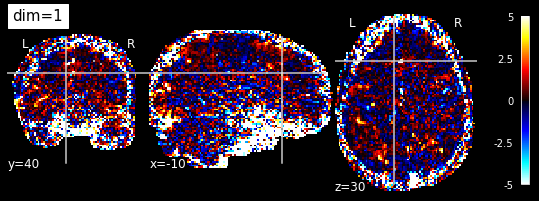

In [22]:
# overlay beta map with brain mask
plotting.plot_stat_map(nib.Nifti1Image(beta_t1, beta_1pt8mm.affine), # this function needs a 3D data file
                       bg_img=nib.Nifti1Image(brainmask, brainmask_1pt8mm.affine), # load the brain mask as a background picture
                       cut_coords=(-10, 40, 30), 
                       threshold=0, title="dim=1",
                       dim=1,vmax=5)

In [37]:
# 1.8mm MTL mask
MTL= nib.load("/home/jovyan/finalProject/nsdMemConn/MTL.nii")
mask = MTL.get_fdata()

In [24]:
print("MTL mask shape:",mask.shape)
print("Unique numbers in the mask:",np.unique(mask))

MTL mask shape: (81, 104, 83)
Unique numbers in the mask: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


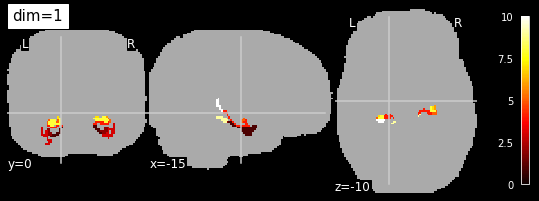

In [25]:
# overlay MTL mask with brain mask
plotting.plot_stat_map(nib.Nifti1Image(mask, MTL.affine), # this argument needs a 3D data file
                       bg_img=nib.Nifti1Image(brainmask, brainmask_1pt8mm.affine), # the anatomical background
                       cut_coords=(-15, 0, -10), 
                       threshold=0, title="dim=1",
                       dim=1,vmax=10)

In [26]:
mask_cor = np.where(mask==1)
print(mask_cor)

(array([26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34,
       48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 5

In [27]:
mask_r1 = beta_t1[mask_cor[0],mask_cor[1],mask_cor[2]]
mask_r1.shape
mask_r1

array([-4.39666667e+00, -1.87000000e+00, -1.10333333e+01,  1.38333333e+00,
        1.01666667e+01, -1.37333333e+00, -5.04333333e+00, -1.71000000e+00,
        7.92666667e+00, -1.00000000e-01,  9.33333333e-02, -1.43566667e+01,
       -3.21333333e+00, -8.86666667e-01, -1.58333333e+00,  8.63666667e+00,
       -2.28000000e+00, -1.83333333e+00,  3.16666667e+00,  5.33333333e-02,
        4.48666667e+00, -6.90333333e+00,  4.40666667e+00, -1.39333333e+00,
       -4.43666667e+00,  2.84000000e+00, -7.05000000e+00, -4.11333333e+00,
       -1.75900000e+01, -5.96666667e-01, -1.59833333e+01,  5.00333333e+00,
        1.54733333e+01,  2.26666667e+00, -2.51000000e+00, -8.13333333e+00,
       -7.20666667e+00,  5.28666667e+00, -1.36666667e+00,  4.13333333e+00,
        3.92666667e+00,  8.26666667e-01,  3.95333333e+00,  2.76333333e+00,
        1.12666667e+00,  3.75666667e+00, -6.53333333e-01,  1.08000000e+00,
        6.00000000e-01,  3.33666667e+00,  5.53333333e-01,  2.40000000e-01,
       -1.77000000e+00,  

In [28]:
np.mean(mask_r1)

-0.39875362318840585

In [53]:
# 1.8mm space functional data
# subj01, session 1
beta_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/betas_session01.nii.gz")
beta_t2 = beta_1pt8mm.slicer[:,:,:,1].get_fdata()/300 # get trial 2
mask_r2 = beta_t2[mask_cor[0],mask_cor[1],mask_cor[2]]
mask_r2.shape
mask_r2

array([-2.34000000e+00, -2.82333333e+00, -1.32933333e+01, -4.61333333e+00,
       -2.80000000e+00, -7.38333333e+00,  8.03333333e-01, -6.10000000e-01,
       -1.93333333e+00, -1.74666667e+00, -2.69333333e+00, -1.00666667e+00,
       -4.63333333e-01, -2.52833333e+01,  1.57900000e+01, -4.36333333e+00,
       -1.24333333e+00,  8.42666667e+00, -1.35000000e+00, -8.23666667e+00,
        1.27866667e+01,  1.90000000e-01,  1.56666667e-01, -2.54666667e+00,
       -1.73333333e+00, -3.45000000e+00, -6.84000000e+00,  3.26000000e+00,
       -2.03300000e+01, -4.81333333e+00,  1.47166667e+01,  2.78000000e+00,
       -1.63800000e+01,  2.36666667e-01,  6.93333333e-01,  1.19266667e+01,
        6.38333333e+00,  4.03666667e+00, -3.84333333e+00,  5.99000000e+00,
       -1.38000000e+00, -4.09333333e+00,  4.84333333e+00, -2.86333333e+00,
        9.33333333e-01,  4.43333333e-01, -6.93333333e-01,  1.22000000e+00,
       -5.33333333e-02,  2.55333333e+00, -1.23666667e+00,  1.78000000e+00,
        2.31333333e+00, -

In [54]:
# 1.8mm space functional data
# subj01, session 1

beta_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/betas_session01.nii.gz")
beta_t3 = beta_1pt8mm.slicer[:,:,:,3].get_fdata()/300 # get trial 3
mask_r3 = beta_t3[mask_cor[0],mask_cor[1],mask_cor[2]]
mask_r3.shape
mask_r3

array([ 1.60066667e+01,  7.26666667e-01,  2.67000000e+00,  8.11666667e+00,
        5.09333333e+00,  3.17000000e+00,  4.89333333e+00,  3.80000000e+00,
       -1.02133333e+01, -3.68000000e+00, -4.38333333e+00, -3.35666667e+01,
        2.85000000e+00, -3.72000000e+00,  5.80000000e+00, -3.13333333e-01,
       -1.08333333e+01, -7.40000000e-01,  2.14000000e+00,  2.76200000e+01,
        3.62700000e+01,  2.33000000e+00, -1.08333333e+00, -1.61666667e+00,
        2.69666667e+00,  2.45666667e+00, -5.85000000e+00,  1.00666667e+00,
        1.89100000e+01, -1.42333333e+00, -9.70000000e-01, -2.30000000e+00,
       -9.37666667e+00,  3.22666667e+00, -1.21333333e+00, -1.95666667e+00,
        7.11000000e+00, -6.44333333e+00, -3.09666667e+00,  1.27100000e+01,
       -2.35333333e+00, -5.60000000e+00,  3.90000000e-01,  4.53666667e+00,
        8.80000000e-01,  2.76666667e-01,  1.53333333e-01, -1.22000000e+00,
        6.70000000e-01, -1.36000000e+00, -9.16666667e-01,  7.26666667e-01,
        1.79333333e+00,  

In [56]:
# 1.8mm space functional data
# subj01, session 1

beta_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/betas_session01.nii.gz")
beta_t4 = beta_1pt8mm.slicer[:,:,:,3].get_fdata()/300 # get trial 4
mask_r4 = beta_t4[mask_cor[0],mask_cor[1],mask_cor[2]]
mask_r4.shape
mask_r4

array([ 1.60066667e+01,  7.26666667e-01,  2.67000000e+00,  8.11666667e+00,
        5.09333333e+00,  3.17000000e+00,  4.89333333e+00,  3.80000000e+00,
       -1.02133333e+01, -3.68000000e+00, -4.38333333e+00, -3.35666667e+01,
        2.85000000e+00, -3.72000000e+00,  5.80000000e+00, -3.13333333e-01,
       -1.08333333e+01, -7.40000000e-01,  2.14000000e+00,  2.76200000e+01,
        3.62700000e+01,  2.33000000e+00, -1.08333333e+00, -1.61666667e+00,
        2.69666667e+00,  2.45666667e+00, -5.85000000e+00,  1.00666667e+00,
        1.89100000e+01, -1.42333333e+00, -9.70000000e-01, -2.30000000e+00,
       -9.37666667e+00,  3.22666667e+00, -1.21333333e+00, -1.95666667e+00,
        7.11000000e+00, -6.44333333e+00, -3.09666667e+00,  1.27100000e+01,
       -2.35333333e+00, -5.60000000e+00,  3.90000000e-01,  4.53666667e+00,
        8.80000000e-01,  2.76666667e-01,  1.53333333e-01, -1.22000000e+00,
        6.70000000e-01, -1.36000000e+00, -9.16666667e-01,  7.26666667e-01,
        1.79333333e+00,  

In [57]:
# 1.8mm space functional data
# subj01, session 1

beta_1pt8mm = nib.load("/home/jovyan/finalProject/nsdMemConn/betas_session01.nii.gz")
beta_t5 = beta_1pt8mm.slicer[:,:,:,4].get_fdata()/300 # get trial 5
mask_r5 = beta_t5[mask_cor[0],mask_cor[1],mask_cor[2]]
mask_r5.shape
mask_r5

array([ 2.34333333e+00, -9.93333333e+00, -1.51800000e+01,  1.13033333e+01,
        1.73333333e-01,  2.83666667e+00,  7.43666667e+00,  8.31333333e+00,
       -1.58133333e+01, -6.46666667e-01, -7.74000000e+00, -4.14233333e+01,
        8.36666667e-01,  9.86000000e+00, -1.01066667e+01, -2.09666667e+00,
        1.09366667e+01, -7.33333333e-01, -2.94333333e+00,  8.56000000e+00,
       -3.79333333e+00,  3.92666667e+00,  6.47333333e+00,  2.56000000e+00,
        2.51666667e+00,  1.10000000e+00, -5.36333333e+00, -1.86333333e+00,
       -9.36666667e-01, -3.43333333e-01,  4.78000000e+00, -5.00000000e-02,
       -2.15366667e+01, -1.06800000e+01, -3.20000000e-01, -1.68966667e+01,
        1.30500000e+01, -1.30300000e+01,  1.19733333e+01,  1.77133333e+01,
       -6.83333333e-01, -4.55333333e+00,  5.77666667e+00,  1.72000000e+00,
        6.66666667e-02,  2.28666667e+00,  1.30333333e+00, -1.17000000e+00,
        1.52000000e+00,  1.03000000e+00,  2.13666667e+00,  1.93000000e+00,
       -2.64666667e+00,  

345